Author - Ishan Kumar Anand

In [54]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np



Reading the Audio File and showing it via ipd 

In [55]:
audio_file = "/Users/ishananand/Desktop/ser/combined_dataset/angry/1007_IWW_ANG_XX.wav"
# It's an Anger Audio File
ipd.Audio(audio_file)

# Loading the Audio File via Librosa

- sampling rate states that how many samples per second were taken for the audio 
- audio_series = is the representation of that which contains Amplitude values over time
- for our use case we will keep the sr as 22.05 as humans sr ranges from 16KHz to 20.05KHz


In [56]:
audio_series, sampling_rate = librosa.load(audio_file, sr=22050, mono=True)
print("Audio File: ", audio_series)
print("Audio Series Shape: ", audio_series.shape)
print("Sampling rate: ", sampling_rate)

Audio File:  [ 1.9430905e-03  2.1565184e-03  2.1482897e-03 ... -1.9744402e-09
 -8.7665919e-10 -7.1735951e-10]
Audio Series Shape:  (62538,)
Sampling rate:  22050


# Melody Filter Bank
- n_fft is number of bins to select for Fast Fourier Transform used in short term fourier Transform
- n_mels is the number of melody filter bands to be created
- $librosa.filters.mel()$ is a 2D array where 
    - each row represents a mel filter
    - each column represents 1 frequency bin in fft spectrum
    - and the size of array will be (n_mels, n_fft//2 + 1)
- for human voices and speech recognition we choose n_fft as 2048 which provide good frequency time balance for  most speeches
- for human voices n_mels is selcted from range of 20 - 40 bins

In [57]:
filter_bank = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=30)
print("Filter banks: ", filter_bank)
print("Shape: ", filter_bank.shape)


Filter banks:  [[0.0000000e+00 9.3454256e-04 1.8690851e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7026387e-05
  8.5131933e-06 0.0000000e+00]]
Shape:  (30, 1025)


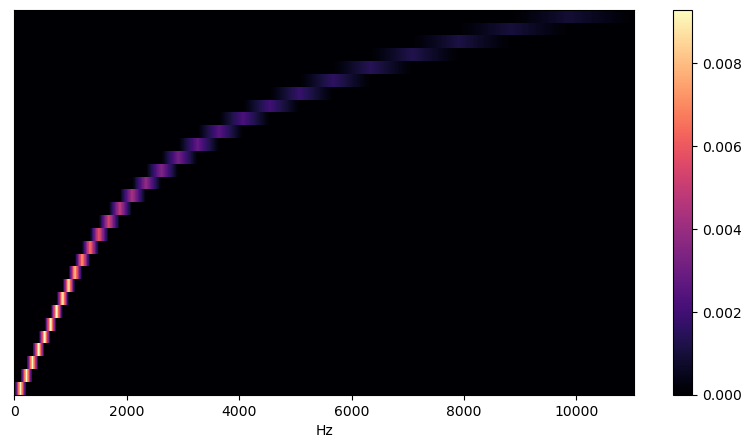

In [58]:
plt.figure(figsize=(10, 5))
# displaying the Mel Filters
librosa.display.specshow(
    data= filter_bank,
    sr = 22050,
    x_axis='linear',
)
plt.colorbar()
plt.show()
# You can count in the image there will be 30 mel_bands

# Mel Spectogram

- Mel Filter Banks are key to getting the Mel Spectograms
- Because the Mel Filters are multiplied with the initial Audio wave specogram to generate MEL Spectograms
- n_hop: number of samples between successive frames. (or) the distance between consecutive fft's

- Shape of the mel_spectogram is (n_mels, Time Axis (Number of Time Frames))
- by default n_mels = 128
- $ time frames = floor(L - n_fft / hopLength) + 1 $
    - L =  The length of Audio Signal
    - n_fft(fast fourier transform or window length)
    - hoplength is n_hop

In [62]:
mel_spectogram = librosa.feature.melspectrogram(y=audio_series,
                                                sr = 22050,
                                                n_fft=2048,
                                                hop_length=512,
                                                # n_mels=40
                                                # for us n_mels is 128 much varied freq range
                                                )
print("Mel Spectogram: ", mel_spectogram)
print("Shape: ", mel_spectogram.shape)

Mel Spectogram:  [[4.4264074e-02 8.3159842e-02 1.5939128e-01 ... 1.0730011e-01
  3.3280790e-01 1.7647319e-01]
 [2.9497778e-02 5.6700114e-02 4.4933438e-02 ... 3.9441600e-02
  8.1393093e-02 3.1423077e-02]
 [3.1663369e-02 2.5440393e-02 2.4730204e-02 ... 3.2825593e-02
  3.7233558e-02 2.0467039e-02]
 ...
 [3.6227750e-08 8.9886099e-09 5.0771975e-16 ... 8.4545355e-16
  9.1675562e-16 2.4502855e-16]
 [3.5676113e-08 8.8542000e-09 7.5150027e-17 ... 5.8162146e-17
  5.1127848e-17 1.7773526e-17]
 [3.5339980e-08 8.7722567e-09 2.6780070e-17 ... 4.6457891e-17
  3.1735760e-17 1.1660927e-17]]
Shape:  (128, 123)


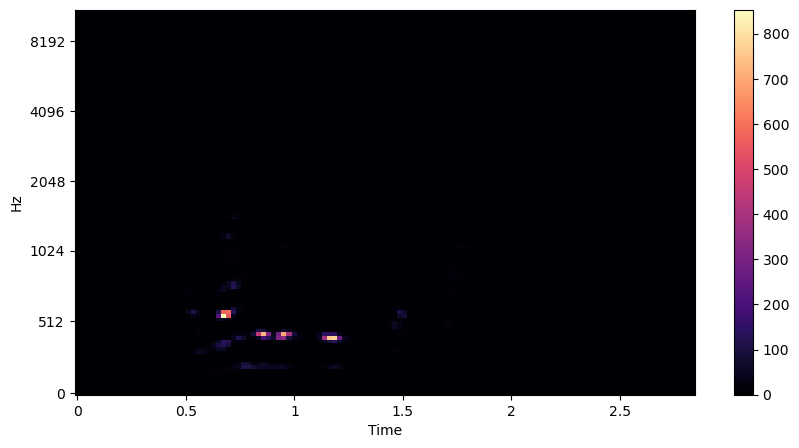

In [63]:
melSpectogram = librosa.power_to_db(mel_spectogram)
plt.figure(figsize=(10, 5))
# displaying the Mel Filters
librosa.display.specshow(
    data= mel_spectogram,
    x_axis="time",
    y_axis="mel",
    sr = 22050
)
plt.colorbar()
plt.show()

Log Melspectogram is what we Human hear (into Decibal Scale)
- $ dB(x)=10 * log10(x / ref) $
- ref as np.max -> This ensures that the highest value in the spectrogram will correspond to 0 dB (the loudest point in the spectrogram).
- ref as np.min -> This would cause the lowest value in the spectrogram to correspond to 0 dB, and all other values would be positive dB values relative to the minimum.
- In practice (np.min) is less common in audio processing because the minimum value in a spectrogram is often 0 (or close to 0), which would lead to numerical issues or an undesired scaling where values are shifted upwards.

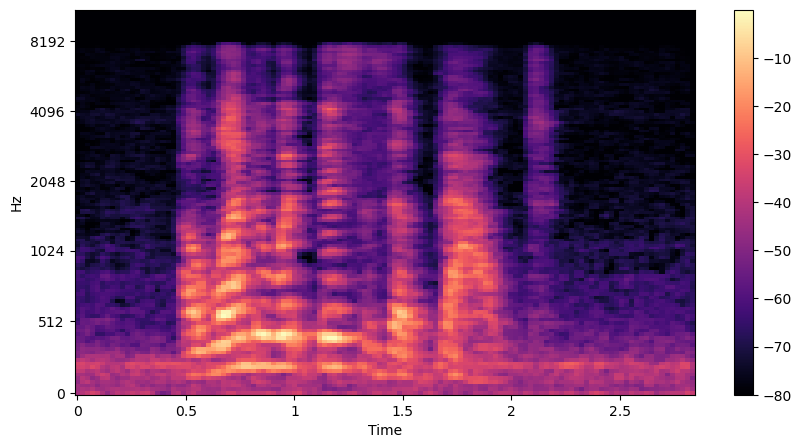

In [64]:
logarithmic_melSpectogram = librosa.power_to_db(mel_spectogram, ref=np.max)
plt.figure(figsize=(10, 5))
# displaying the Mel Filters
librosa.display.specshow(
    data= logarithmic_melSpectogram,
    x_axis="time",
    y_axis="mel",
    sr = 22050
)
plt.colorbar()
plt.show()